# Conditional likelihoods of trajectories

In [136]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from scipy import stats

import os

os.environ['GILLESPIE'] = '/dev/shm/Git/Gillespie/cmake-build-release/Gillespie'

In [137]:
matplotlib.rc_file_defaults()

In [155]:
from analyzer import analyzer

In [156]:
mutual_informations = np.load('../data/mutual_information.npz')['arr_0']
mutual_information = np.mean(mutual_informations, axis=(0,1))

In [157]:
num_s, num_r = mutual_informations.shape[0:2]

In [158]:
def subset_indices(num_responses, subset_signals, subset_responses):
    assert subset_responses <= num_responses
    indices = np.zeros((subset_signals * subset_responses, 2), dtype=int)
    for s in range(subset_signals):
        for r in range(subset_responses):
            indices[s*subset_responses + r] = [s, r]
    return indices.T
    

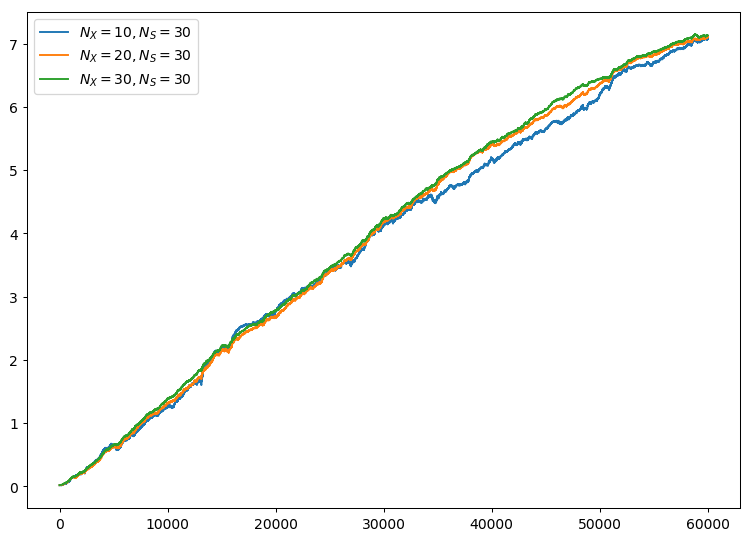

In [159]:
for r in [10,20]:
    indices = subset_indices(num_r, num_s, r)
    subset_mean = np.mean(mutual_informations[indices[0], indices[1]], axis=0)
    plt.plot(np.arange(len(subset_mean)), subset_mean, label='$N_X={}, N_S={}$'.format(r, num_s))
plt.plot(np.arange(len(mutual_information)), mutual_information, label='$N_X={}, N_S={}$'.format(num_r, num_s))
plt.legend();

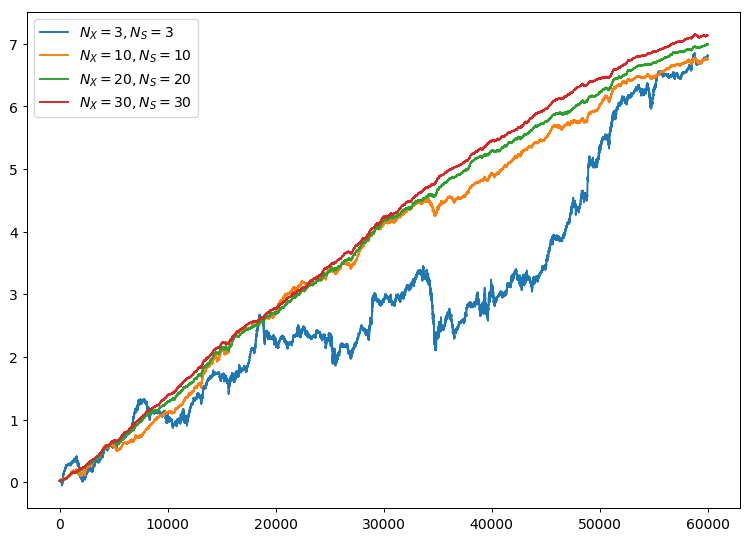

In [160]:
for s, r in [[3,3],[10, 10], [20, 20]]:
    indices = subset_indices(num_r, s, r)
    subset_mean = np.mean(mutual_informations[indices[0], indices[1]], axis=0)
    plt.plot(np.arange(len(subset_mean)), subset_mean, label='$N_X={}, N_S={}$'.format(r, s))
plt.plot(np.arange(len(mutual_information)), mutual_information, label='$N_X={}, N_S={}$'.format(num_r, num_s))
plt.legend();

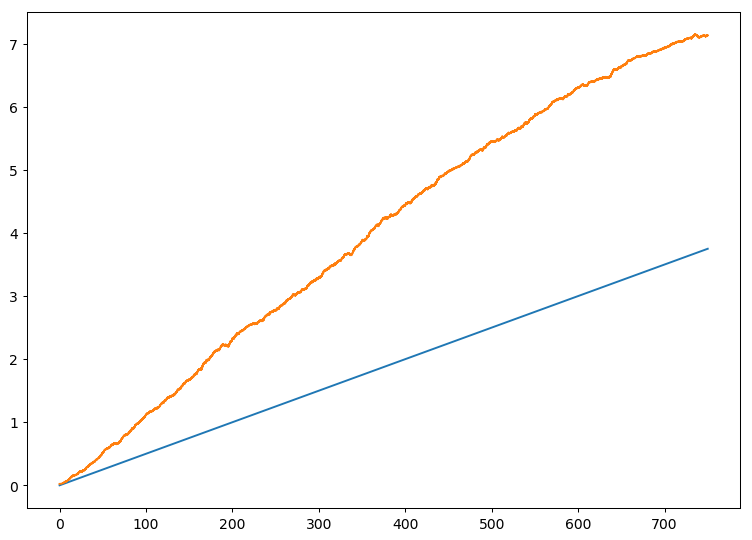

In [162]:
x = np.linspace(0, 750, len(mutual_information))
plt.plot(x, 0.005*x)
plt.plot(x, mutual_information, label='$N_X={}, N_S={}$'.format(num_r, num_s));

In [145]:
from pathlib import Path
signal = analyzer.load_trajectory(Path('../data/signal/sig1.traj'))

In [146]:
analyzer.simulate_trajectory('response.inp', '../data/response.traj', ['../data/signal/sig1.traj'], seed=52)

/Users/mr/Git/Gillespie/CPP/build/Gillespie response.inp -s 52 -o /Users/mr/Git/Gillespie/data/response.traj -t /Users/mr/Git/Gillespie/data/signal/sig1.traj


In [147]:
response = analyzer.load_trajectory(Path('../data/response.traj'))

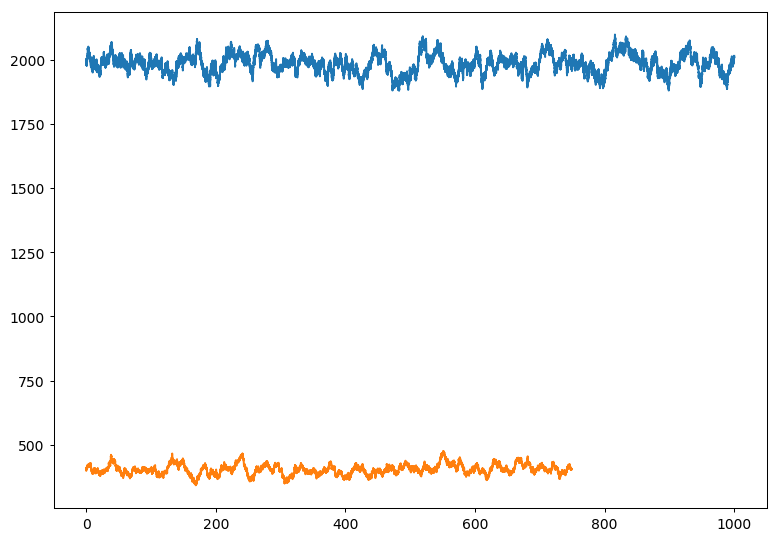

In [148]:
plt.plot(signal['timestamps'], signal['components']['S'])
plt.plot(response['timestamps'], response['components']['X'])

In [45]:
print(response['timestamps'][-1])

2563.591628293917


In [165]:
%lprun

UsageError: Line magic function `%lprun` not found.
